<a href="https://colab.research.google.com/github/AnnKulyk/Python/blob/main/%D0%B4_%D0%B7_%22HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


In [6]:
df.info

<bound method DataFrame.info of                      season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                     ...      ...         ...      ...    ...     ...   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81     0.0000       3          13     16   
2011-01-01 01:00:00        80     0.0000       8          32     40   
2011-01-01 02:00:00        80     0.0000       5          27     32   
2011-01-01 03:00:00        75     0.0000       3          10     13   
2011-01-01 04:00:00        75     0.0000       0           1      1   
...                       ...        ...     ...         ...    ...   
2012-12-19 19:00:00        50    26.0027       7         329    336   
2012-12-19 20:00:00        57    15.0013      10         231    241   
2012-12-19 21:00:00        61    15.0013       4         164    168   
2012-12-19 22:00:00        61     6.0032      12         117    129   
2012-12-19 23:00:00        66     8.9981       4          84     88   

                           date  day  week  weekday_num    weekday  year  \
datetime                                                                   
2011-01-01 00:00:00  2011-01-01    1    52            5   Saturday  2011   
2011-01-01 01:00:00  2011-01-01    1    52            5   Saturday  2011   
2011-01-01 02:00:00  2011-01-01    1    52            5   Saturday  2011   
2011-01-01 03:00:00  2011-01-01    1    52            5   Saturday  2011   
2011-01-01 04:00:00  2011-01-01    1    52            5   Saturday  2011   
...                         ...  ...   ...          ...        ...   ...   
2012-12-19 19:00:00  2012-12-19   19    51            2  Wednesday  2012   
2012-12-19 20:00:00  2012-12-19   19    51            2  Wednesday  2012   
2012-12-19 21:00:00  2012-12-19   19    51            2  Wednesday  2012   
2012-12-19 22:00:00  2012-12-19   19    51            2  Wednesday  2012   
2012-12-19 23:00:00  2012-12-19   19    51            2  Wednesday  2012   

                     month  hour  
datetime                          
2011-01-01 00:00:00      1     0  
2011-01-01 01:00:00      1     1  
2011-01-01 02:00:00      1     2  
2011-01-01 03:00:00      1     3  
2011-01-01 04:00:00      1     4  
...                    ...   ...  
2012-12-19 19:00:00     12    19  
2012-12-19 20:00:00     12    20  
2012-12-19 21:00:00     12    21  
2012-12-19 22:00:00     12    22  
2012-12-19 23:00:00     12    23  

[10886 rows x 19 columns]>

In [7]:
df.shape #розмір таблиці

(10886, 19)

In [8]:
type(df)

pandas.core.frame.DataFrame

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

In [9]:
df['date'].diff().value_counts()

,count
date,
0 days,10430
1 days,432
13 days,13
12 days,8
10 days,1
11 days,1


In [16]:
df.isnull().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0
registered,0


In [17]:
df.duplicated()

,0
datetime,
2011-01-01 00:00:00,False
2011-01-01 01:00:00,False
2011-01-01 02:00:00,False
2011-01-01 03:00:00,False
2011-01-01 04:00:00,False
...,...
2012-12-19 19:00:00,False
2012-12-19 20:00:00,False
2012-12-19 21:00:00,False


## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [10]:
df['date'] = pd.to_datetime(df['date'])
daily_counts = df.groupby(df['date'].dt.date)['count'].sum()

In [11]:
df['date'] = pd.to_datetime(df['date'])
daily_counts = df.groupby('date')['count'].sum()

<Axes: title={'center': 'Динаміка оренди велосипедів'}, xlabel='Дата', ylabel='Кількість орендованих'>

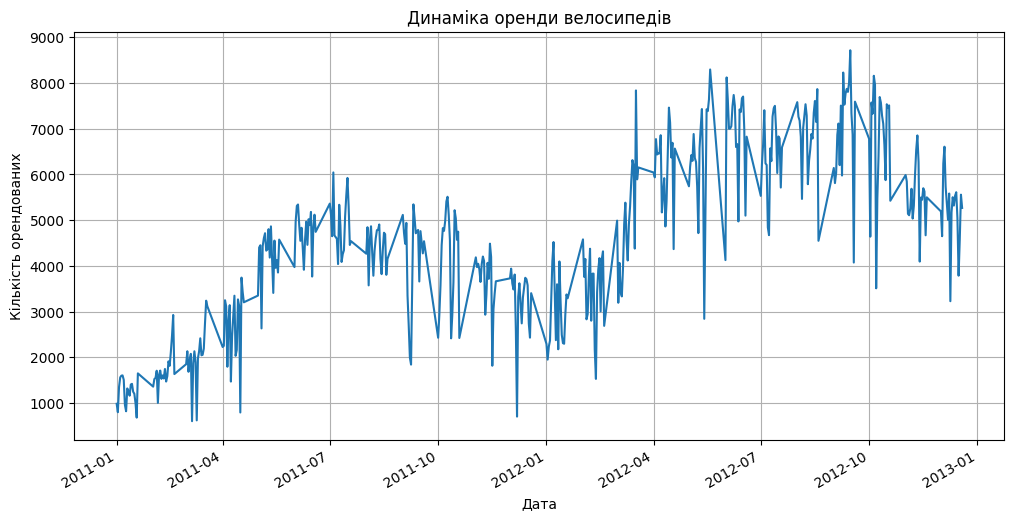

In [12]:
daily_counts.plot(
    kind="line",
   # marker=0,
    figsize=(12,6),
    title='Динаміка оренди велосипедів',
    xlabel= 'Дата',
    ylabel= 'Кількість орендованих',
    grid=True
)

Заломи свідчать про тенденцію попиту на вело поїздки в той чи інший період часу. причини можуть бути повязані з погодніми умовами, з вихідними чи святковими днями, зі зміною цін на оренду. щоб зменшити заломи можна перегрупувати графік помісячно. Загалом графік показує загальні тенденції збільшення попиту в весняно-літній сезон і зменшення - взимку. Це є типовим для велопрокату через погодні умови. ця динаміка є циклічною. Аномально високі  відхилення можуть свідчити про якісь  вело заходи чи святкові події.

<Axes: title={'center': 'Оренда велосипедів (щомісячна)'}, xlabel='datetime'>

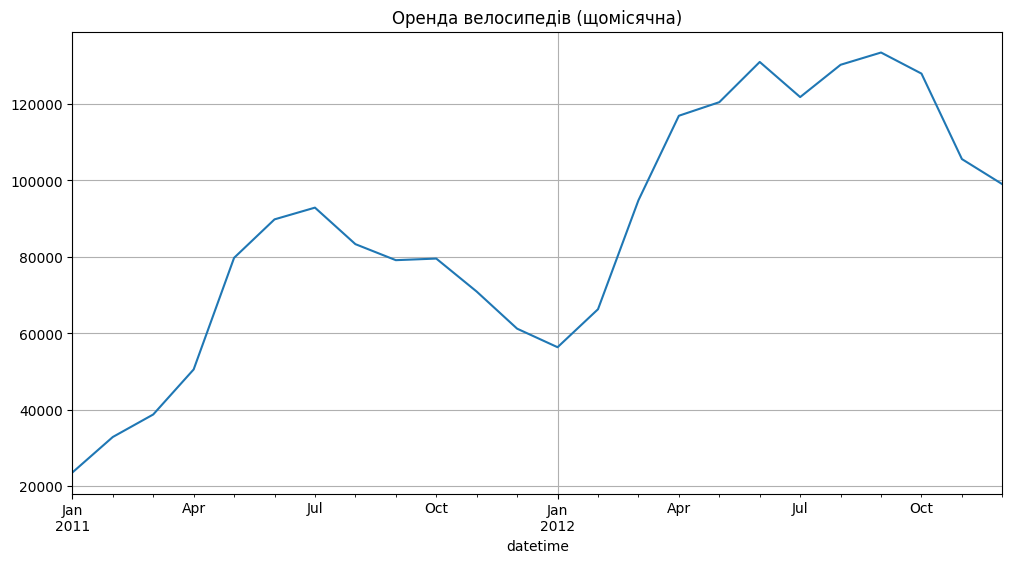

In [13]:
# Перегрупування даних по тижнях щоб зменшити заломи
monthly_counts = df['count'].resample('ME').sum()



monthly_counts.plot(
    figsize=(12,6),
    title='Оренда велосипедів (щомісячна)',
    grid=True
    )

Завдання 2: Аналіз сезонності (Bar Plot)
Завдання: Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:

Позначте сезони не числом, а назвою на візуалізації.
Додайте підписи над стовпцями зі значеннями в кожному стовпці.
Дайте відповіді на питання нижче.

Питання для інтерпретації:

В який сезон найбільша середня кількість оренди велосипедів?
Як ви можете пояснити таку сезонну закономірність?
У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

<Axes: title={'center': 'Середня кількість оренди велосипедів за сезонами'}, xlabel='Сезон', ylabel='Середня кількість оренд'>

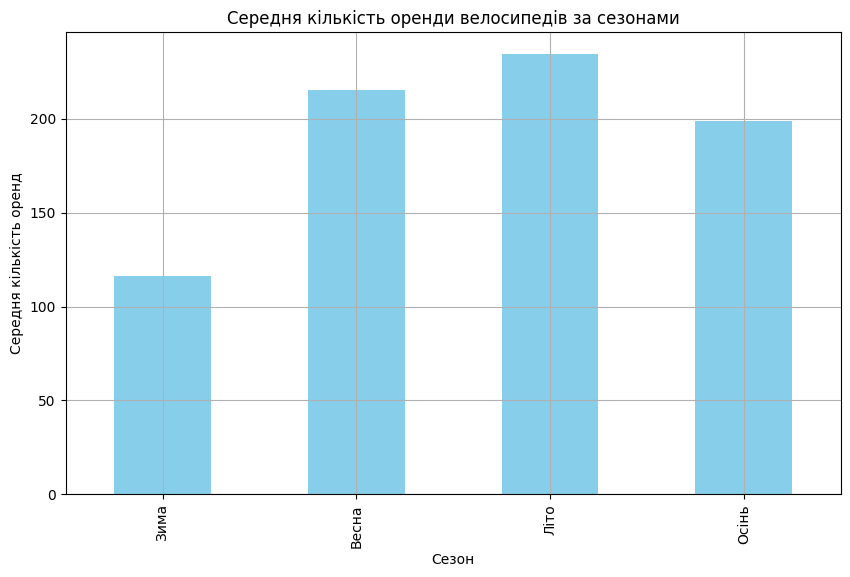

In [22]:
# Створення колонки з назвою сезону
season_map = {
    1: 'Зима',
    2: 'Весна',
    3: 'Літо',
    4: 'Осінь'
}
df['season_name'] = df['season'].map(season_map)

# Групування та обчислення середньої кількості оренд
season_avg = df.groupby('season_name')['count'].mean().reindex(['Зима', 'Весна', 'Літо', 'Осінь'])


season_avg.plot(
    kind='bar',
    figsize=(10, 6),
    title='Середня кількість оренди велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд',
    grid=True,
    color='skyblue'
)


Закономірно найбільшою популярністю оренда велосипедів користується влітку та навесні. Цьому сприяють погодні умови і сезон відпусток та шкільних канікул, також влітку значно довший світловий день.

In [20]:
max_значення = season_avg.max()
min_значення = season_avg.min()
різниця = max_значення / min_значення
print(f'У {різниця:.1f} рази більше в найактивніший сезон порівняно з найменш активним.')

У 2.0 рази більше в найактивніший сезон порівняно з найменш активним.


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


<Axes: title={'center': 'Динаміка за місяцями'}, xlabel='Місяць', ylabel='Середня кількість оренди'>

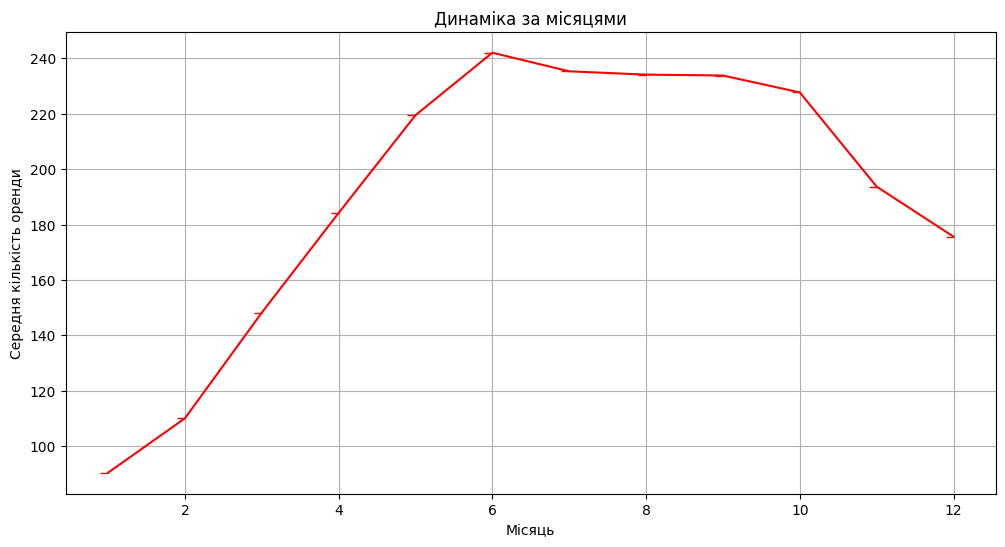

In [37]:
month_avg=df.groupby("month")["count"].mean()
month_avg.plot(
    kind='line',
    marker=0,
    color='red',
    grid=True,
    title='Динаміка за місяцями',
    figsize=(12,6),
    xlabel='Місяць',
    ylabel='Середня кількість оренди'
)

Пік оренди відбувається в червні. Найменша кількість - січень.Так місячний аналіз повністю підтверджує сезонний аналіз. Клімат напряму впливає на бажання орендувати велосипеди і здійснювати поїздки. Адже влітку сухо, тепло і довгий день - це сприятливі умови. Зимою все навпаки. В перехідні сезони відбувається поступове зростання чи спадання оренди в залежності від погодніх умов

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [38]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,season_name
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,Зима
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,Зима
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2,Зима
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3,Зима
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4,Зима


<Axes: title={'center': 'Розподіл погодних умов'}, ylabel='count'>

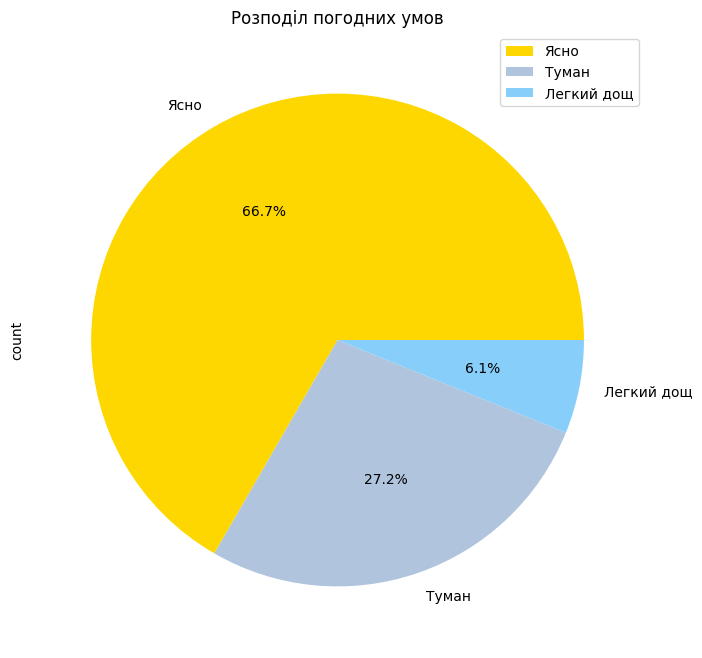

In [43]:
df['date_only'] = df['date'].dt.date
daily_weather = df.groupby('date_only')['weather'].first()

weather_counts = daily_weather.value_counts().sort_index()

weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
custom_colors = {
    1: '#FFD700',  #  (ясно)
    2: '#B0C4DE',  #  (туман)
    3: '#87CEFA',  #  (дощ)
    4: '#DC143C'   #  (сильний дощ)
}
weather_counts.plot(
    kind='pie',
    labels=[weather_labels[i] for i in weather_counts.index],
    colors=[custom_colors[i] for i in weather_counts.index],
    autopct='%.1f%%',
    legend=True,
    figsize=(8, 8),
    title='Розподіл погодних умов'
)

В переважній більшості орендували велосипеди в ясну погоду. В сильний дощ оренди не відбувались. Майже 6% орендували під час легкого дощу

In [45]:
print("Днів із сильним дощем:", weather_counts.get(4, 0))
print("Частка (%):", round(weather_counts.get(4, 0) / weather_counts.sum() * 100, 1), "%")

Днів із сильним дощем: 0
Частка (%): 0.0 %


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

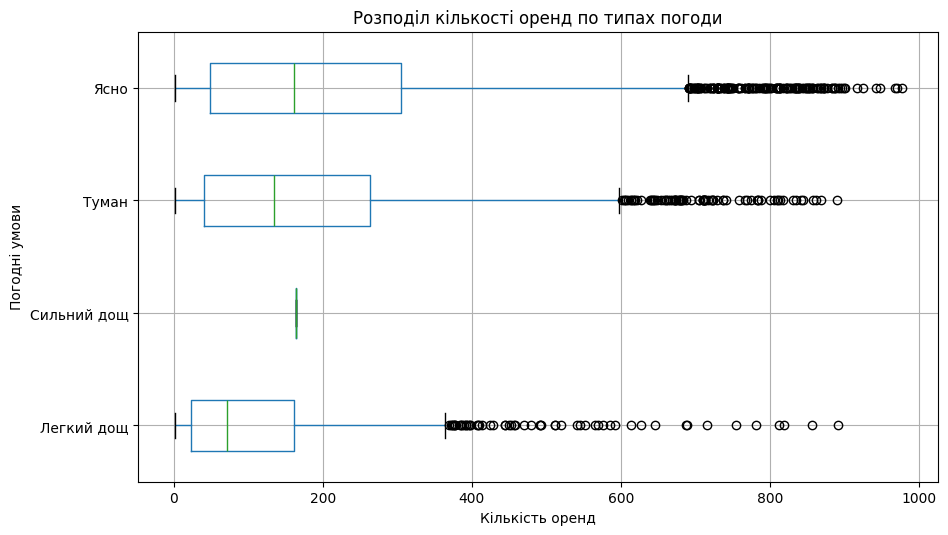

In [60]:
# Створення нової колонки з назвою погоди
df['weather_desc'] = df['weather'].map(weather_labels)

# Побудова box plot-а
df.boxplot(
    column='count',
    by='weather_desc',
    vert=False,               # Горизонтальна орієнтація
    figsize=(10, 6),
    grid=True,
    xlabel=('Кількість оренд'),
    ylabel=('Погодні умови')
)

plt.title('Розподіл кількості оренд по типах погоди')
plt.suptitle('')
plt.show()

найбільший розкид при ясній погоді, видно довгі вуса. Значні викиди при легкому дощі, модливо в ті дні проходили масові заходи. найвище медіанне значення при середній погоді

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

Text(0, 0.5, 'Кількість оренд')

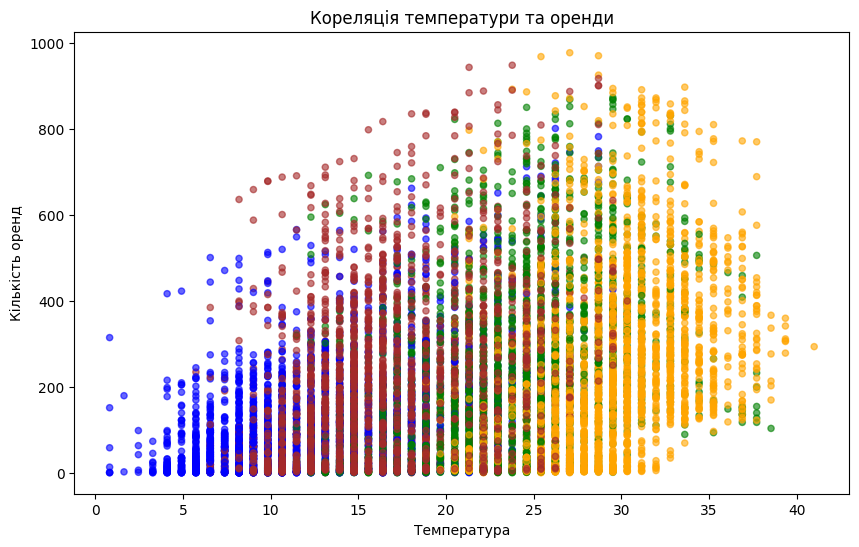

In [64]:
season_colors = {
    'Весна': 'green',
    'Літо': 'orange',
    'Осінь': 'brown',
    'Зима': 'blue'
}

df['color'] = df['season_name'].map(season_colors)

ax = df.plot.scatter(
    x='temp',
    y='count',
    c=df['color'],
    alpha=0.6,
    figsize=(10, 6),
    title='Кореляція температури та оренди'
)

ax.set_xlabel('Температура')
ax.set_ylabel('Кількість оренд')

Звісно кореляція помітна, при збільшенні температури збільшується попит на оренду.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

Text(0, 0.5, 'Середня кількість оренд')

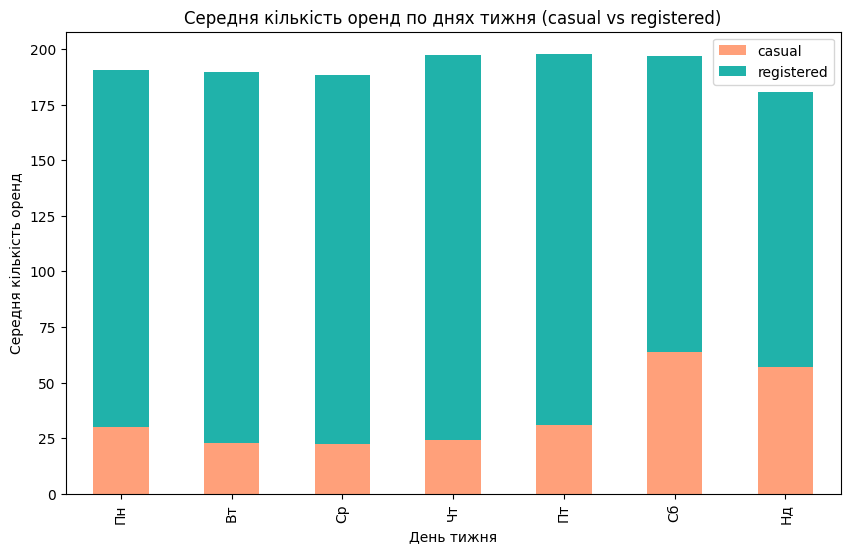

In [71]:

ordered_days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']
day_map = {0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Нд'}

df['weekday_name'] = df['weekday_num'].map(day_map)

avg_by_day = df.groupby('weekday_name')[['casual', 'registered']].mean()

avg_by_day = avg_by_day.reindex(ordered_days)

ax = avg_by_day.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#FFA07A', '#20B2AA'],
    title='Середня кількість оренд по днях тижня (casual vs registered)'
)
ax.set_xlabel('День тижня')
ax.set_ylabel('Середня кількість оренд')

в пятницю і четвер переважають зареєстровані орендарі. Можливо це постійні користувачі, спортсмени у яких режим. На вихідні більше орендують разові користувачі, тому вони не реєструються